In [74]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

# read in the json files
# portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
# profile = pd.read_json('data/profile.json', orient='records', lines=True)
# transcript = pd.read_json('data/transcript.json', orient='records', lines=True)
# offer_completed_df = pd.read_csv('data/offer_received.csv')
# portfolio_df = pd.read_csv('portfolio.csv')
# profile_df = pd.read_csv('profile_df.csv')
# transaction_df = pd.read_csv('transaction.csv')
viewed_completed_df = pd.read_csv('data/viewed_completed.csv')
complete_df = pd.read_csv('data/complete_df.csv')

In [3]:
complete_df.head()

,person,age,gender,income,became_member_on,membership_duration,offer_id,offer_type,minimum_amount_required,duration,...,transaction,received,viewed,completed,time_received,time_viewed,time_completed,transaction_time,amount_spent,offer_completed_reward
0,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,10,discount,10,168,...,1,1,0,1,576,0.0,576.0,228.0,22.16,2.0
1,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,10,discount,10,168,...,1,1,0,1,576,0.0,576.0,414.0,8.57,2.0
2,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,10,discount,10,168,...,1,1,0,1,576,0.0,576.0,528.0,14.11,2.0
3,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,10,discount,10,168,...,1,1,0,1,576,0.0,576.0,552.0,13.56,2.0
4,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,10,discount,10,168,...,1,1,0,1,576,0.0,576.0,576.0,10.27,2.0


In [30]:
viewed_completed_df.head()

,person,age,gender,income,became_member_on,membership_duration,offer_id,offer_type,minimum_amount_required,duration,...,transaction,received,viewed,completed,time_received,time_viewed,time_completed,transaction_time,amount_spent,offer_completed_reward
0,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,3,informational,0,96,...,1,1,1,0,336,372.0,0.0,228.0,22.16,0.0
1,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,3,informational,0,96,...,1,1,1,0,336,372.0,0.0,414.0,8.57,0.0
2,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,3,informational,0,96,...,1,1,1,0,336,372.0,0.0,528.0,14.11,0.0
3,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,3,informational,0,96,...,1,1,1,0,336,372.0,0.0,552.0,13.56,0.0
4,0009655768c64bdeb2e877511632db8f,33,M,72000.0,2017-04-21,461,3,informational,0,96,...,1,1,1,0,336,372.0,0.0,576.0,10.27,0.0


Shows the outcome for the dataset where only the received and viewed offers are included.

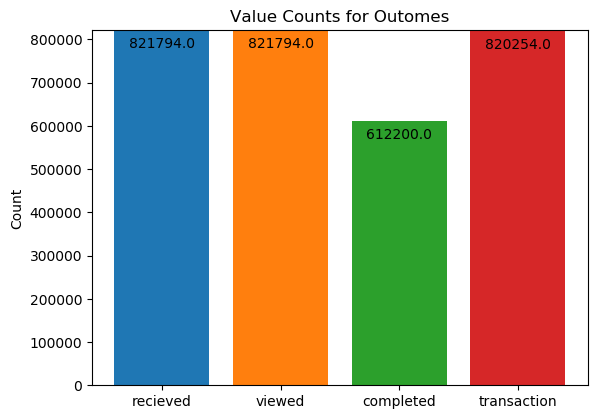

In [76]:
data = {
    'recieved': viewed_completed_df['received'],
    'viewed': viewed_completed_df['viewed'],
    'completed': viewed_completed_df['completed'],
    'transaction': viewed_completed_df['transaction']
}

df = pd.DataFrame(data)


value_counts = df.apply(pd.Series.value_counts)

x_labels = value_counts.columns
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
rects = ax.bar(x, value_counts.loc[1], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, -5),  # 5 points vertical offset
                textcoords="offset points",
                ha='center', va='top')

ax.set_ylabel('Count')
ax.set_title('Value Counts for Outomes')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, len(df))

plt.subplots_adjust(top=0.85)

plt.show()

# plt.savefig(os.path.join('photos/viewed_completed_outcomes.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


Shows the outcomes for all sent offers

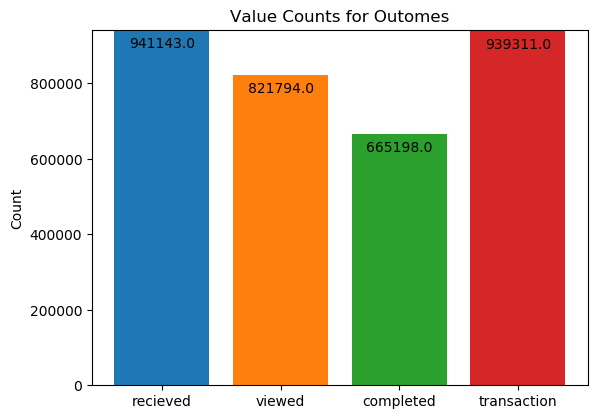

In [77]:
data = {
    'recieved': complete_df['received'],
    'viewed': complete_df['viewed'],
    'completed': complete_df['completed'],
    'transaction': complete_df['transaction']
}

df = pd.DataFrame(data)


value_counts = df.apply(pd.Series.value_counts)

x_labels = value_counts.columns
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
rects = ax.bar(x, value_counts.loc[1], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, -5), 
                textcoords="offset points",
                ha='center', va='top')

ax.set_ylabel('Count')
ax.set_title('Value Counts for Outomes')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, len(df))

plt.subplots_adjust(top=0.85)

plt.show()

# plt.savefig(os.path.join('photos/complete_df_outcomes.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


# Which offer was the most successful in terms of the number of completed transactions.

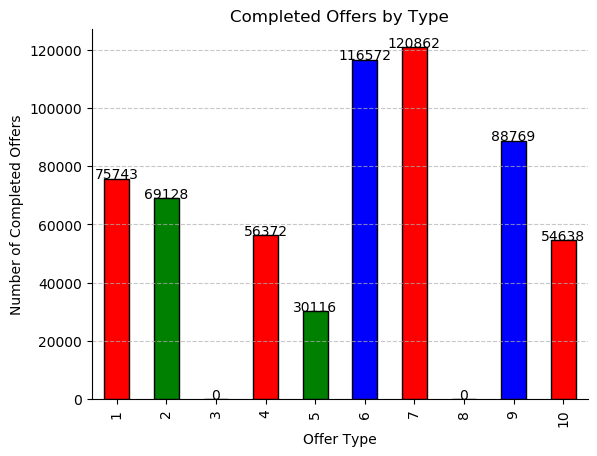

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# sample data
data = {'Offer': viewed_completed_df['offer_id'],
        'Completed': viewed_completed_df['completed'], 
        'Offer Type': viewed_completed_df['offer_type']
       }

# create a pandas DataFrame
df = pd.DataFrame(data)

# count the number of completed offers for each offer type
completed_counts = df.groupby('Offer')['Completed'].sum()

# create a bar chart with different colors for each offer type
colors = ['red', 'green', 'blue']
ax = completed_counts.plot(kind='bar', color=[color for color in colors], edgecolor='black')

# add data labels to the bars
for i, v in enumerate(completed_counts.values):
    ax.text(i, v + 0.6, str(v), ha='center')

# adjust the chart layout and formatting
ax.set_xlabel('Offer Type')
ax.set_ylabel('Number of Completed Offers')
ax.set_title('Completed Offers by Type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# plt.savefig(os.path.join('photos/completed_offers.png'), dpi=300, format='png', bbox_inches='tight') 


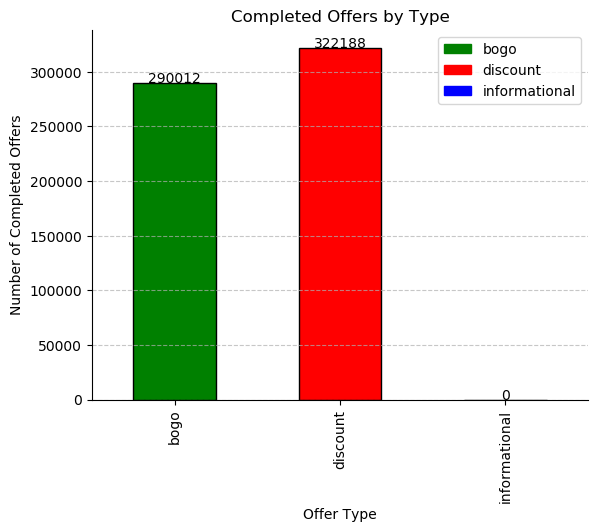

In [79]:
# create sample data
data = {'offer': viewed_completed_df['offer_id'],
        'offer_type': viewed_completed_df['offer_type'],
        'completed': viewed_completed_df['completed']}

# create a pandas DataFrame
df = pd.DataFrame(data)

# count the number of completed offers for each offer type
completed_counts = df.groupby('offer_type')['completed'].sum()

# set colors for each offer type
colors = {'discount': 'red', 'bogo': 'green', 'informational': 'blue'}

# plot the bar chart with different colors for each offer type
ax = completed_counts.plot(kind='bar', color=[colors[i] for i in completed_counts.index], edgecolor='black')

# add data labels to the bars
for i, v in enumerate(completed_counts.values):
    ax.text(i, v + 0.6, str(v), ha='center')

# add a legend that shows the colors of each offer type
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in completed_counts.index]
labels = completed_counts.index
plt.legend(handles, labels)

# adjust the chart layout and formatting
ax.set_xlabel('Offer Type')
ax.set_ylabel('Number of Completed Offers')
ax.set_title('Completed Offers by Type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# plt.savefig(os.path.join('photos/completed_offers_by_type.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures



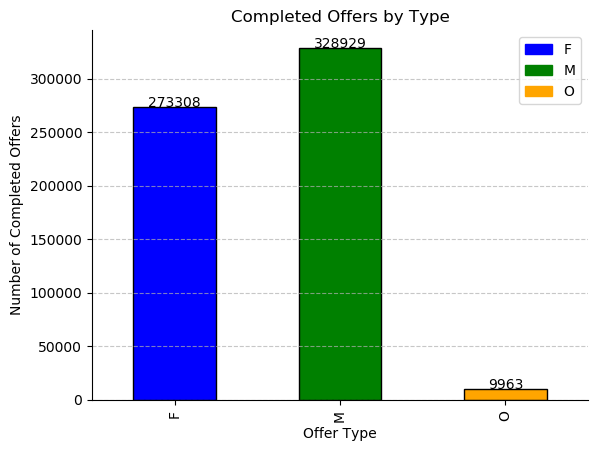

In [80]:
# create sample data
data = {'gender': viewed_completed_df['gender'],
        'completed': viewed_completed_df['completed']}

# create a pandas DataFrame
df = pd.DataFrame(data)

# count the number of completed offers for each offer type
completed_counts = df.groupby('gender')['completed'].sum()

# set colors for each offer type
colors = {'M': 'green', 'F': 'blue', 'O': 'orange'}

# plot the bar chart with different colors for each offer type
ax = completed_counts.plot(kind='bar', color=[colors[i] for i in completed_counts.index], edgecolor='black')

# add data labels to the bars
for i, v in enumerate(completed_counts.values):
    ax.text(i, v + 0.6, str(v), ha='center')

# add a legend that shows the colors of each offer type
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in completed_counts.index]
labels = completed_counts.index
plt.legend(handles, labels)

# adjust the chart layout and formatting
ax.set_xlabel('Offer Type')
ax.set_ylabel('Number of Completed Offers')
ax.set_title('Completed Offers by Type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# plt.savefig(os.path.join('photos/completed_offers_by_gender.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures



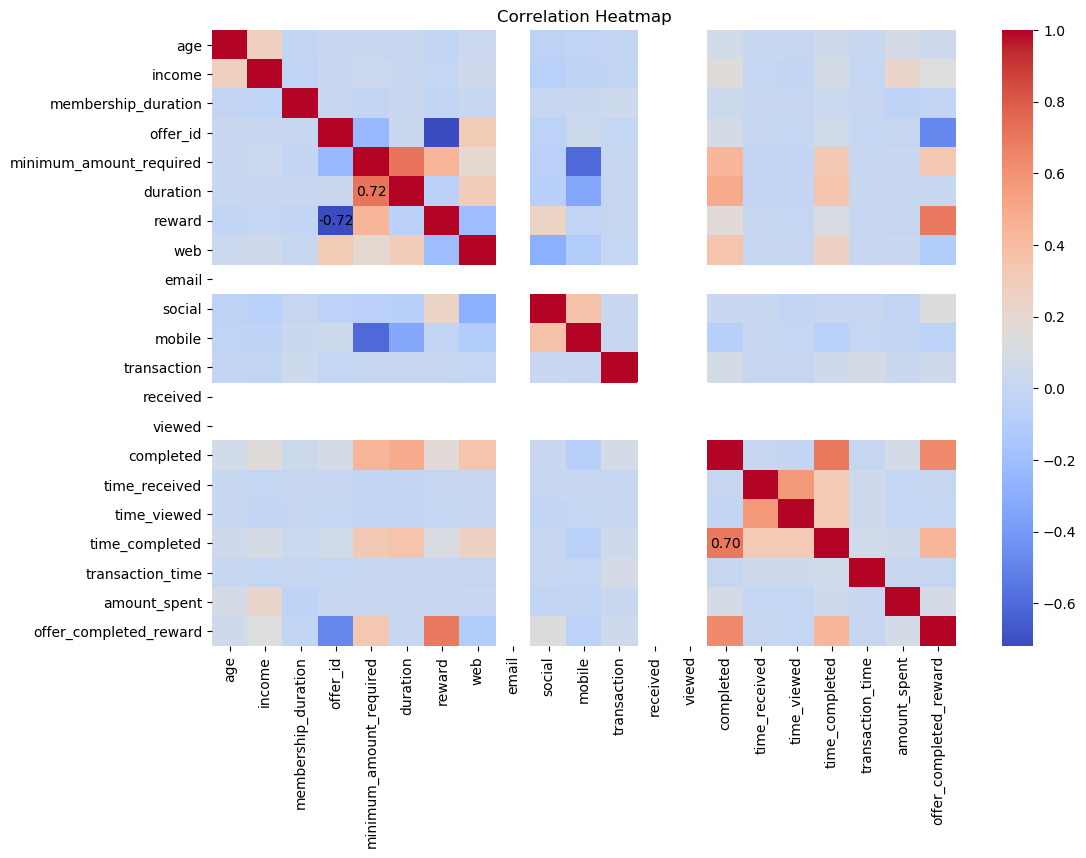

In [81]:
corr = viewed_completed_df.corr()

fig, ax = plt.subplots(figsize=(12, 8))

threshold = 0.7

sns.heatmap(corr, cmap='coolwarm')


for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            text = ax.text(j + 0.5, i + 0.5, "{:.2f}".format(corr.iloc[i, j]),
                           ha="center", va="center", color="black", fontsize=10)

plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.title('Correlation Heatmap')
plt.show()

# plt.savefig(os.path.join('photos/correlation_heat_map.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
